In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
from sklearn import cluster, preprocessing
import scipy 
import seaborn as sns
import folium
import geopy

%matplotlib inline

In [3]:
dataset=pd.read_csv("makemytrip_com-travel_sample.csv")
dataset.head()

C:\Users\rahul\AppData\Local\Temp\ipykernel_22220\1246907446.py:1: DtypeWarning: Columns (12,14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv("makemytrip_com-travel_sample.csv")


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,...,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,21-06-2016,{{facility}},|Zion Home Stay is located in a city that sets...,1 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,21-06-2016,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,21-06-2016,{{facility}},|A 2 star property is located at 24 km from Ma...,2 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,21-06-2016,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1 star,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,21-06-2016,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0


In [4]:
dataset.columns

Index(['area', 'city', 'country', 'crawl_date', 'highlight_value',
       'hotel_overview', 'hotel_star_rating', 'image_urls', 'in_your_room',
       'is_value_plus', 'latitude', 'longitude', 'mmt_holidayiq_review_count',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_rating',
       'mmt_review_score', 'mmt_traveller_type_review_count',
       'mmt_tripadvisor_count', 'pageurl', 'property_address', 'property_id',
       'property_name', 'property_type', 'qts', 'query_time_stamp',
       'room_types', 'site_review_count', 'site_review_rating', 'sitename',
       'state', 'traveller_rating', 'uniq_id'],
      dtype='object')

In [5]:
z= ["latitude","longitude"]
data= dataset[z]
df=pd.DataFrame(data)
df

,latitude,longitude
0,24.581788,73.667805
1,24.544342,73.644242
2,24.579942,73.681953
3,24.622607,73.855194
4,24.580100,73.682200
...,...,...
20031,11.769778,76.001652
20032,25.310400,83.010200
20033,12.307097,76.667002
20034,11.607579,76.082773


In [6]:
df.isna().sum()

latitude     22
longitude    21
dtype: int64

In [7]:
df=df.dropna()
df

,latitude,longitude
0,24.581788,73.667805
1,24.544342,73.644242
2,24.579942,73.681953
3,24.622607,73.855194
4,24.580100,73.682200
...,...,...
20031,11.769778,76.001652
20032,25.310400,83.010200
20033,12.307097,76.667002
20034,11.607579,76.082773


In [12]:
lower_bound = df['latitude'].quantile(0.01)
upper_bound = df['latitude'].quantile(0.99)
df = df[(df['latitude'] > lower_bound) & (df['latitude'] < upper_bound)]

lower_bound = df['longitude'].quantile(0.01)
upper_bound = df['longitude'].quantile(0.99)
df = df[(df['longitude'] > lower_bound) & (df['longitude'] < upper_bound)]

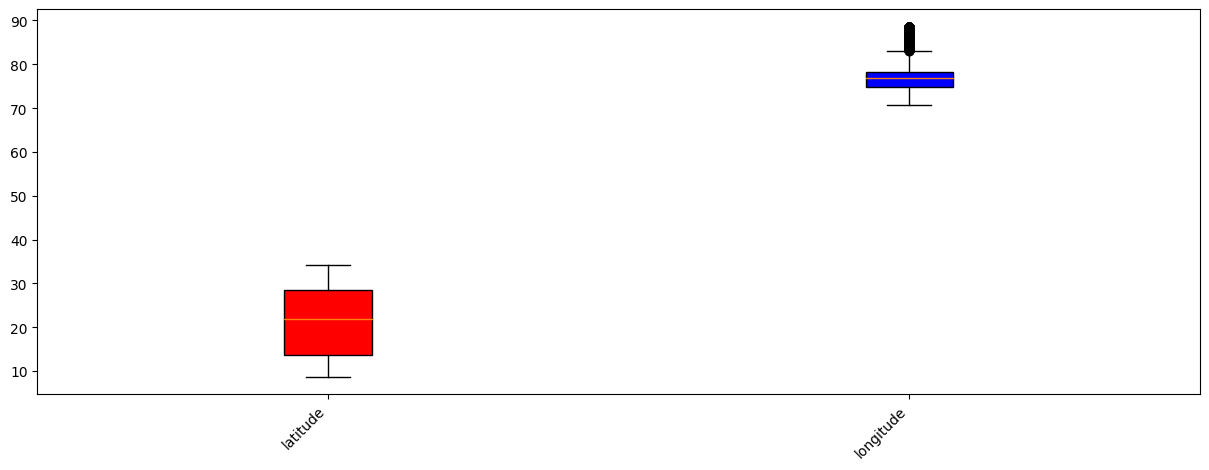

In [13]:
colors=["red", "blue"]
plt.figure(figsize=(15,5))
box = plt.boxplot(df, labels=z, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(rotation=45, ha='right')
plt.show()

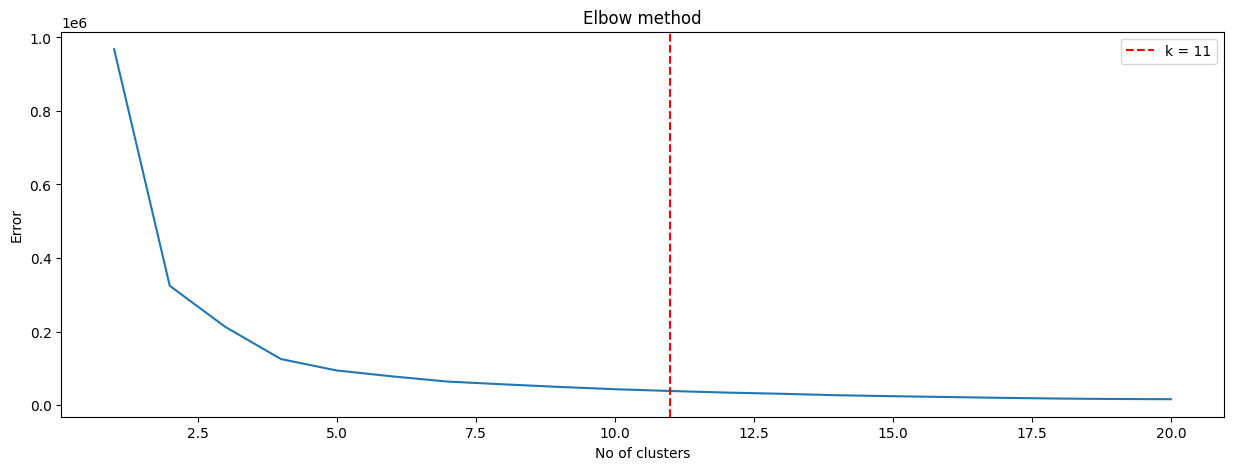

In [14]:
Error=[]
r= range(1,21)
for i in r:
    kmeans= cluster.KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    Error.append(kmeans.inertia_)
k = [i*100 for i in np.diff(Error,2)].index(min([i*100 for i 
     in np.diff(Error,2)]))
plt.figure(figsize=(15,5))
plt.plot(r, Error)
plt.axvline(k, ls='--', color='red', label='k = '+str(k))
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.legend()

In [54]:
x=["latitude","longitude","room_types","site_review_rating","property_address"]
data2= dataset[x]
df2=pd.DataFrame(data2)
df2= df2.dropna()
df2

,latitude,longitude,room_types,site_review_rating,property_address
1684,12.986415,77.595370,Deluxe|Studio,4.6,"34, Cunningham Road , Cunningham Road"
1685,12.936044,77.621610,Standard|Deluxe,4.3,"No 52, 5th Cross, 6th Block, Next to Vijaya Ba..."
1686,19.115473,72.889134,Economy Room|Suite,3.3,"Saki Vihar Complex, Opp. Saki Vihar Road, Saki..."
1730,26.864600,75.589900,Deluxe,4.8,"Village Sanjharia, Before Toll gate, Via Vatik..."
2121,30.459626,78.063851,Standard (non View)|Super Deluxe ( View Side )...,4.6,"Monarch Hotel, Gandhi Chowk , Library Chowk"
...,...,...,...,...,...
18890,20.296100,85.824500,Standard Non Ac|Standard AC|Deluxe Ac|Super De...,4.2,"366/A, Old Station Bazar, In front of Railway ..."
18891,30.226976,74.942411,Deluxe Room|Executive Suite,4.6,"Barnala , Barnala Bye Paas Road"
18893,11.388123,75.718613,Sea Facing|Beach Facing,3.8,"PO Chemancherry, Thoovappara, Kappad , Kappad"
18894,20.268086,85.843338,Economy Non A/c Room|Royal Deluxe Room Non A/c...,3.5,"122/A New Station Square, Kharvelnagar , Railw..."


In [55]:
lat=df2["latitude"] 
lon=df2["longitude"] 
k = 11
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = df2[["latitude","longitude"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
df2[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
df2

C:\Users\rahul\AppData\Local\Temp\ipykernel_22220\599972601.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_X["centroids"].iloc[i] = 1


,latitude,longitude,room_types,site_review_rating,property_address,cluster,centroids
1684,12.986415,77.595370,Deluxe|Studio,4.6,"34, Cunningham Road , Cunningham Road",3,0
1685,12.936044,77.621610,Standard|Deluxe,4.3,"No 52, 5th Cross, 6th Block, Next to Vijaya Ba...",3,0
1686,19.115473,72.889134,Economy Room|Suite,3.3,"Saki Vihar Complex, Opp. Saki Vihar Road, Saki...",5,0
1730,26.864600,75.589900,Deluxe,4.8,"Village Sanjharia, Before Toll gate, Via Vatik...",9,0
2121,30.459626,78.063851,Standard (non View)|Super Deluxe ( View Side )...,4.6,"Monarch Hotel, Gandhi Chowk , Library Chowk",2,0
...,...,...,...,...,...,...,...
18890,20.296100,85.824500,Standard Non Ac|Standard AC|Deluxe Ac|Super De...,4.2,"366/A, Old Station Bazar, In front of Railway ...",0,0
18891,30.226976,74.942411,Deluxe Room|Executive Suite,4.6,"Barnala , Barnala Bye Paas Road",2,0
18893,11.388123,75.718613,Sea Facing|Beach Facing,3.8,"PO Chemancherry, Thoovappara, Kappad , Kappad",8,0
18894,20.268086,85.843338,Economy Non A/c Room|Royal Deluxe Room Non A/c...,3.5,"122/A New Station Square, Kharvelnagar , Railw...",0,0


Text(0.5, 1.0, 'Clustering (k=11)')

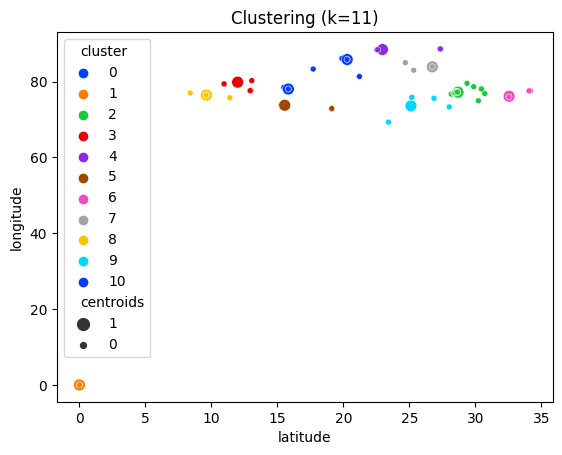

In [56]:
model = cluster.AffinityPropagation()

k = df2["cluster"].nunique()
sns.scatterplot(x="latitude", y="longitude", data=df2,
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [57]:
city = "Bhopal"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
"[lat, long]:", location

Bhopal, Huzur Tahsil, Bhopal, Madhya Pradesh, 462001, India


('[lat, long]:', [23.2584857, 77.401989])

In [58]:
x, y = "latitude", "longitude"
color = "cluster"
size = "site_review_rating"
popup = "property_address"
marker = "centroids"
data = df2.copy()
## create color column
lst_elements = sorted(list(df2[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(df2[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_